Create a model for predicting sell, and compare how logistic regression and k-nearest neighbors would perform. Which one performs best? Why?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('web_campaign_simulated.xlsx')

In [6]:
data['referral'].value_counts()

google          1879
                1830
facebook         923
newsletter B     912
tumblr           879
newsletter A     869
twitter          859
nyt              859
Name: referral, dtype: int64

In [4]:
def check_referral(referral, site):
    if referral == site:
        return 1
    return 0

In [7]:
data['google'] = data['referral'].apply(check_referral, args=('google',))
data['facebook'] = data['referral'].apply(check_referral, args=('facebook',))
data['news_a'] = data['referral'].apply(check_referral, args=('newsletter A',))
data['news_b'] = data['referral'].apply(check_referral, args=('newsletter B',))
data['nyt'] = data['referral'].apply(check_referral, args=('nyt',))
data['tumblr'] = data['referral'].apply(check_referral, args=('tumblr',))
data['twitter'] = data['referral'].apply(check_referral, args=('twitter',))

In [11]:
data.columns

Index(['id', 'age', 'female', 'used_search', 'referral', 'time_spent',
       'campaign_1', 'campaign_2', 'click', 'sell_old', 'sell', 'google',
       'facebook', 'news_a', 'news_b', 'nyt', 'tumblr', 'twitter'],
      dtype='object')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)

logistic regression

In [10]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [12]:
features = ['age', 'female', 'google', 'twitter', 'click', 'time_spent', 'campaign_2','sell_old']

In [13]:
logit_clf.fit(train[features], train['sell'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pd.DataFrame(np.transpose(logit_clf.coef_), features)

,0
age,-0.030750
female,-0.154640
google,-0.088579
twitter,0.042908
click,0.346261
time_spent,0.085222
campaign_2,-1.318801
sell_old,-0.557208


In [15]:
test['predicted_sell_logit'] = logit_clf.predict(test[features])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
test[test['sell']==1]['predicted_sell_logit'].value_counts()

1    664
0     17
Name: predicted_sell_logit, dtype: int64

In [17]:
test[test['sell']==0]['predicted_sell_logit'].value_counts()

0    1106
1      15
Name: predicted_sell_logit, dtype: int64

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
print(confusion_matrix(test['sell'], test['predicted_sell_logit']))

[[1106   15]
 [  17  664]]


In [19]:
print(classification_report(test['sell'], test['predicted_sell_logit']))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1121
          1       0.98      0.98      0.98       681

avg / total       0.98      0.98      0.98      1802



K-nearest neighbors

In [21]:
n_clf = KNeighborsClassifier(n_neighbors=5)

In [22]:
n_clf.fit(train[features], train['sell'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
test['predicted_sell_nn'] = n_clf.predict(test[features])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
print(confusion_matrix(test['sell'], test['predicted_sell_nn']))

[[1113    8]
 [  20  661]]


In [25]:
print(classification_report(test['sell'], test['predicted_sell_nn']))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1121
          1       0.99      0.97      0.98       681

avg / total       0.98      0.98      0.98      1802



From above test, the logistic regression and k-nearest neighbors perform quite equally. The precision and recall metrics of both method are similarly high (which makes me feel that it is a bit too good to be true). Comparing confusion matrix, logistic regression made less wrong prediction of sell(1) while k-nearest neighbors made less wrong prediction of sell(0). 

Make some changes to the KNeighborsClassifier (number of neighbors). What happens with precision & recall?

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train[features], train['sell'])
pred = knn.predict(test[features])
print (classification_report(test['sell'], pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1121
          1       0.98      0.98      0.98       681

avg / total       0.98      0.98      0.98      1802



I have tried some numbers like 3, 4, 10, 20, 50 but precision and recall didnt change much (from 0.98 to 0.99)

In [39]:
from sklearn.model_selection import cross_val_score

In [52]:
neighbors = range(1,50)
cv_scores = []
for k in neighbors:
    kn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kn, train[features], train['sell'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0,0.5,'Cross validation scores')

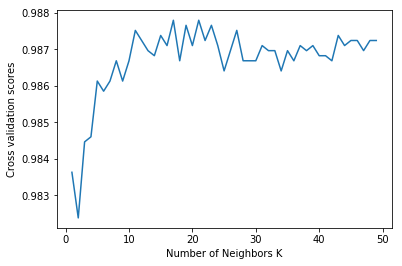

In [59]:
plt.plot(neighbors,cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross validation scores')

In [53]:
MSE = [1 - x for x in cv_scores]

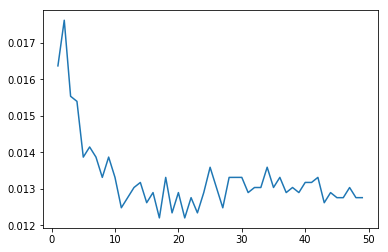

In [54]:
plt.plot(neighbors,MSE)

In [58]:
optimal_k = neighbors[MSE.index(min(MSE))]
print(optimal_k)

21


Above is a way to conduct cross validation and misclassification error for K-nearest neighbors. The result is that for k number=21 the misclassification error is the smallest. 
I found this method here https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/